In [74]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import k_means, kmeans_plusplus, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import math

In [75]:
#Look at an image
def showDigit(digit, label, size=28):
    some_digit = digit
    #turn array into the correct shape
    some_digit_image = np.array(some_digit).reshape(size, size)
    #imshow displays an array like an image
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.title(label)
    plt.axis("off")
    plt.show()

#Display multiple digits
def showDigits(digits, labels, indexes, size=28):
    #Make a grid that is the right size
    pics = len(indexes)
    cols = 8
    rows = math.ceil(pics/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(14,6))
    plt.axis("off")

    #loop through the list of indexes, grab images and labels, plot in the "next" spot. 
    for i in range(0, pics):
        n = indexes[i]
        some_digit = digits[n:n+1]
        some_digit_image = np.array(some_digit).reshape(size, size)
        ax = axes[i//cols, i%cols]
        ax.axis("off")
        ax.imshow(some_digit_image, cmap=mpl.cm.binary)
        #ax.set_title('Ind: {} - Lbl: {}'.format(indexes[i], labels[n]))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

# Assignment 3 - Clustering



## Load Data

Note: testing will be much faster with a subset of records. 

In [76]:
#Load Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist = mnist[0:15000]
X = mnist["data"]
print(X.shape)

(70000, 784)


## Cluster 

We need to break the data into clusters first. 

In [77]:
y_null = [" ", " ", " ", " ", " ", " ", " ", " ", " ", " "]
indexes = np.array(range(0,24))

(24, 784)


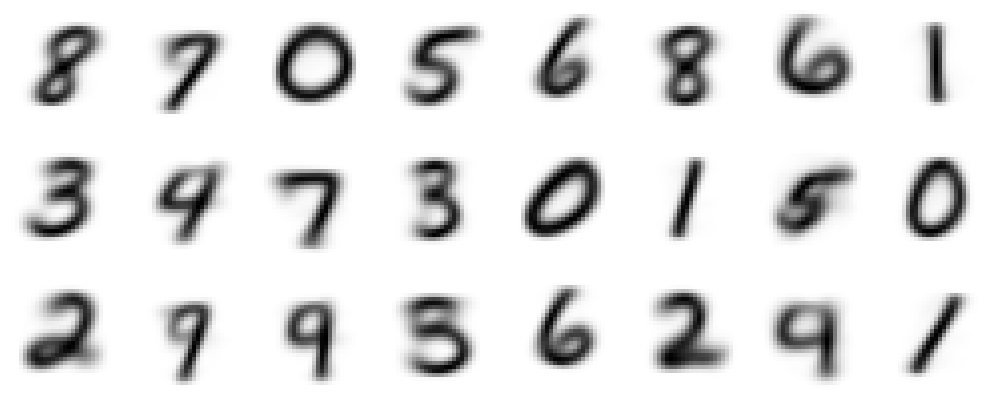

In [79]:
kmeans = KMeans(n_clusters=24, init="k-means++", random_state=12)
clusters = kmeans.fit_predict(X)
print(kmeans.cluster_centers_.shape)
centers = kmeans.cluster_centers_.reshape(24, 28, 28)
showDigits(digits=centers, labels=y_null, indexes=indexes, size=28)

## Cluster with PCA

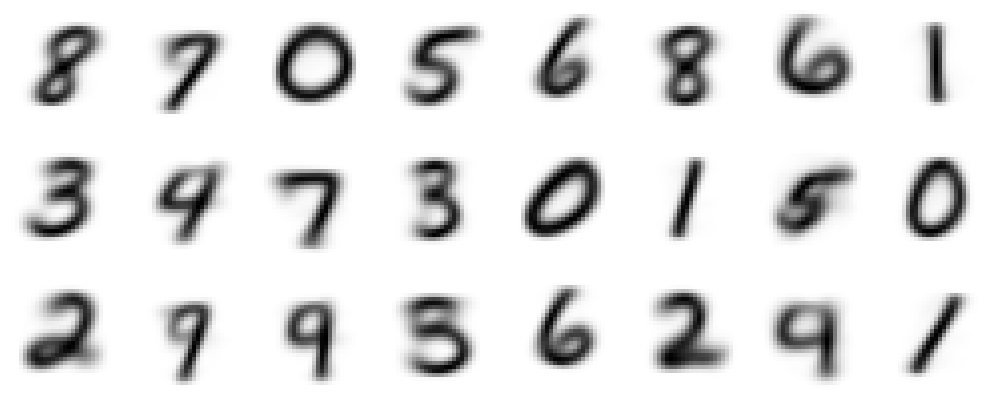

In [80]:
kmeans = KMeans(n_clusters=24, init="k-means++", random_state=12)
clus_pca = PCA()
clus_trans = clus_pca.fit_transform(X)
clusters = kmeans.fit_predict(clus_trans)

centers = clus_pca.inverse_transform(kmeans.cluster_centers_).reshape(24, 28, 28)
showDigits(digits=centers, labels=y_null, indexes=indexes, size=28)

## Visually Match the Clusters

Note: The label here is not the actual value of that number, they're assigned sequentially by the clustering, which does not know what each number is. 

In [85]:
df = pd.DataFrame(X)
df["label"] = kmeans.labels_
df["label"].value_counts()

18    4221
17    3850
11    3645
9     3446
19    3339
7     3260
1     3247
14    3227
13    3200
22    3083
21    2936
8     2890
0     2865
20    2798
4     2782
16    2766
5     2735
10    2636
23    2433
2     2318
3     2317
12    2226
15    2031
6     1749
Name: label, dtype: int64

In [86]:
map_dict = {0:8, 1:7, 2:0, 3:5, 4:6, 5:8, 6:6, 7:1, 8:3, 9:4, 10:7, 11:3, 12:0, 13:1, 14:5, 15:0, 16:2, 17:9, 18:9, 19:5, 20:6, 21:2, 22:9, 23:1}
df["label"] = df["label"].map(map_dict)
df["label"].value_counts()

9    11154
1     8893
5     8883
6     7329
0     6575
3     6535
7     5883
2     5702
8     5600
4     3446
Name: label, dtype: int64

0


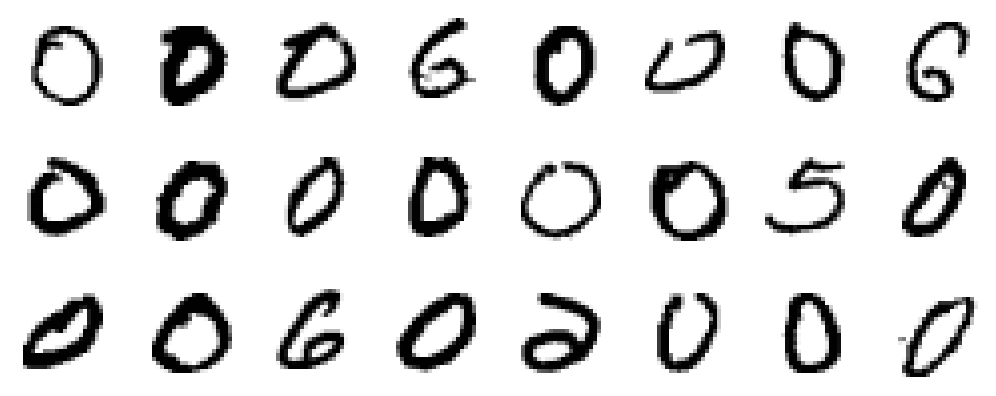

1


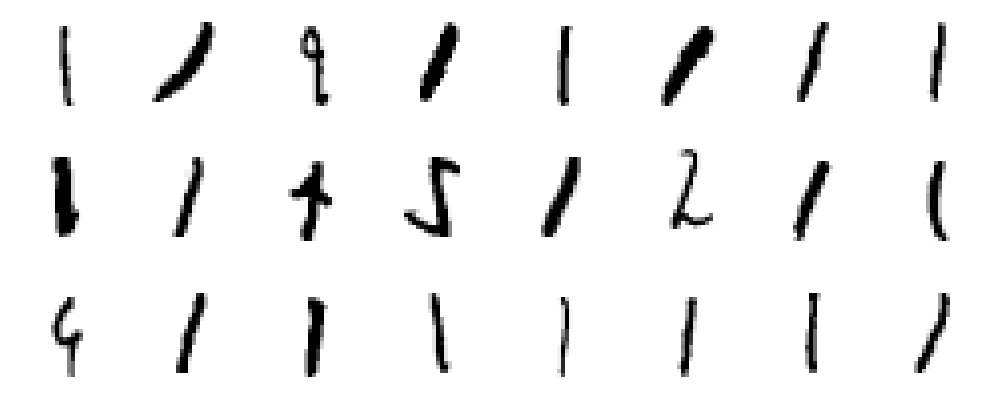

2


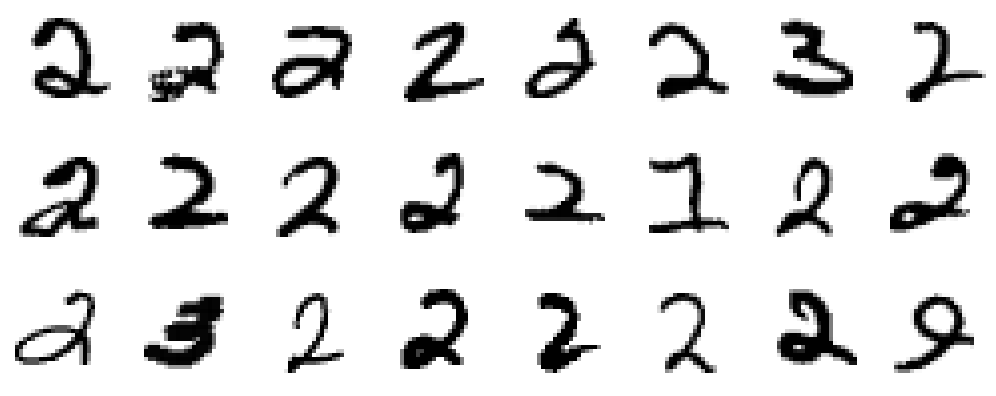

3


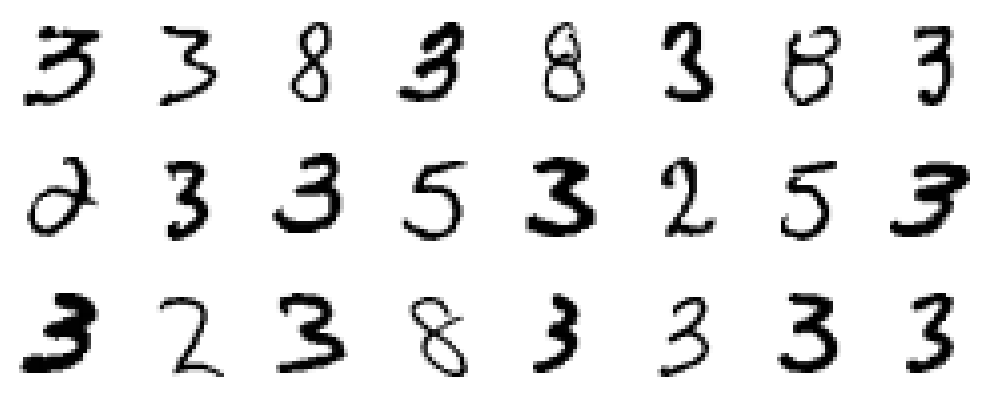

4


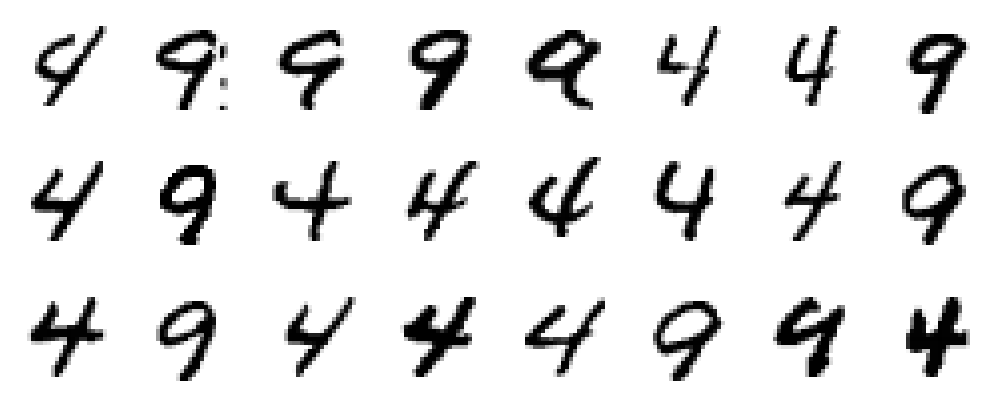

5


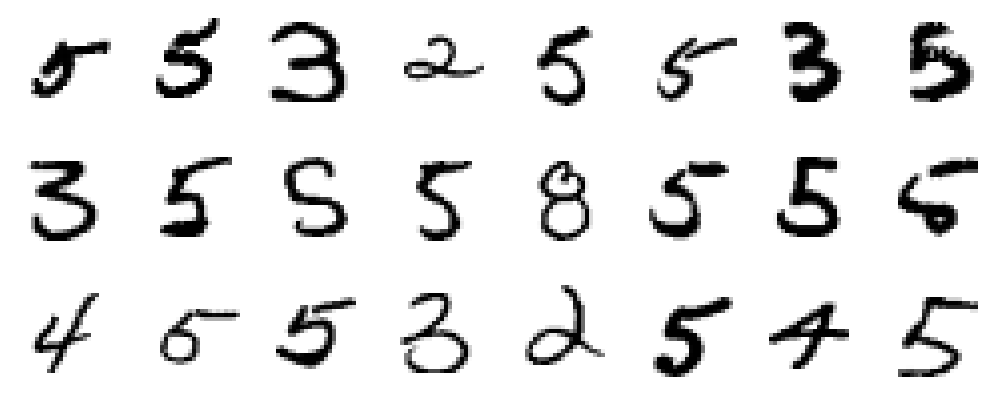

6


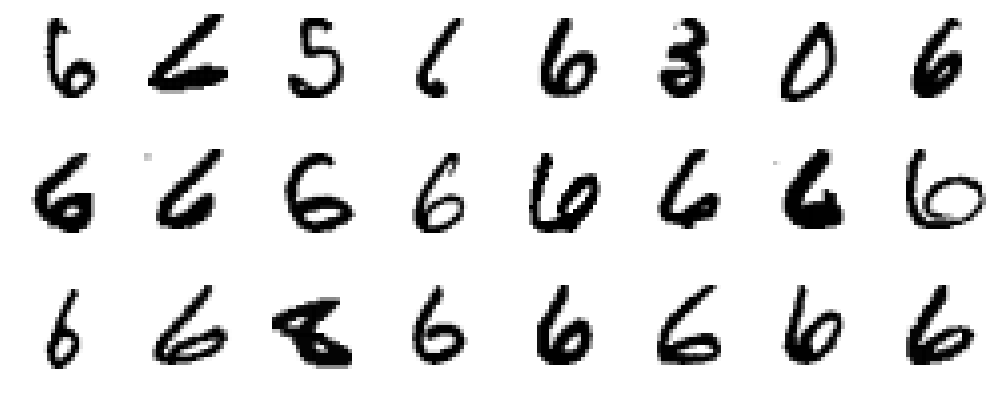

7


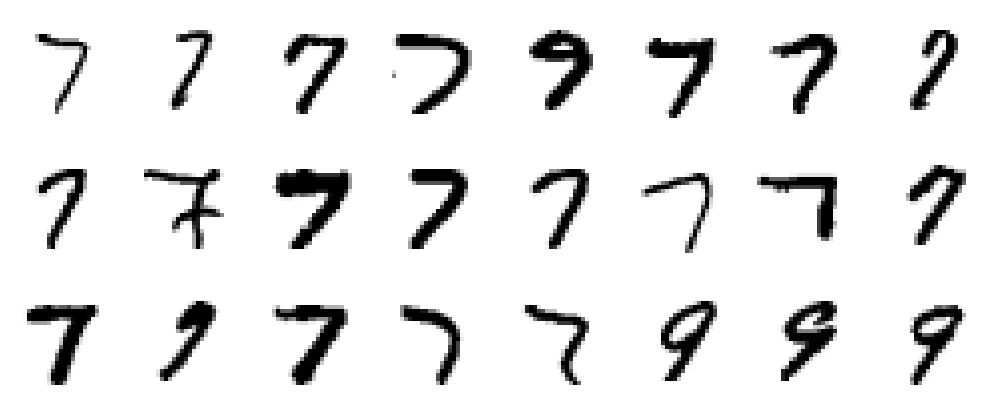

8


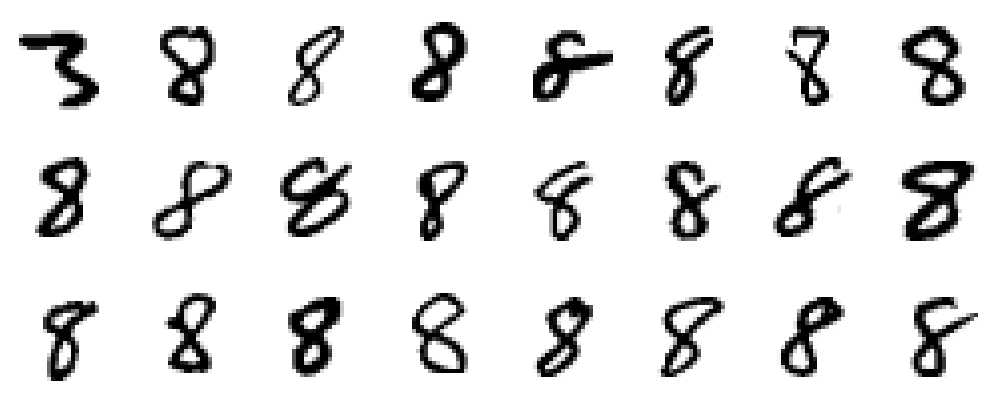

9


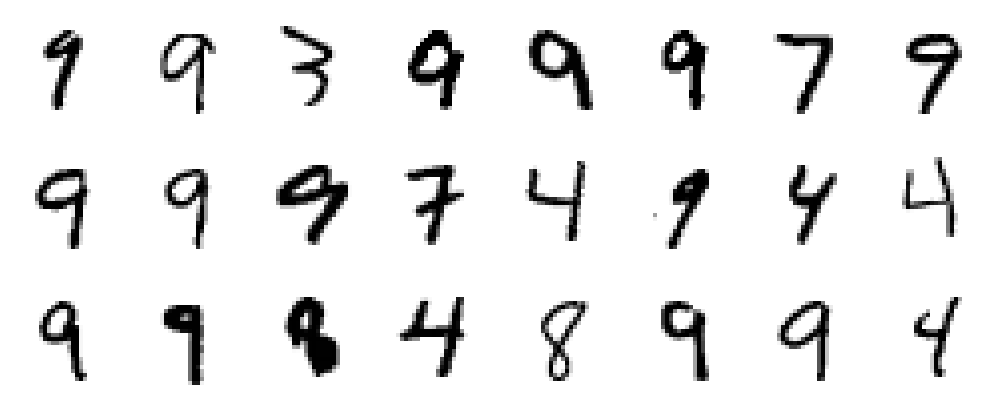

In [87]:
for i in range(10):
    samp_ind = df[df["label"] == i].index.values
    rows = df.loc[samp_ind,:].sample(24)
    print_ind = rows.index.values
    y_tmp = np.full(10, i)
    ind_tmp = np.array(range(0,10))
    #print(print_ind)
    print(i)
    showDigits(df.drop(columns={"label"}).to_numpy(), y_tmp, print_ind)

### Data is Labeled

We now have a label for each cluster. They are moderately accurate by visual verification. 

## Create Generators with GMM

In [90]:
np.array(df[df["label"]==1].drop(columns={"label"})).shape

(8893, 784)

In [119]:
generators = []

for i in range(10):
    gmm = GaussianMixture(covariance_type='full', random_state=0)
    tmp_data = np.array(df[df["label"] == i].drop(columns={"label"}))
    gmm.fit(tmp_data)
    generators.append(gmm)
    print(str(i), "Converged:", gmm.converged_)

0 Converged: True
1 Converged: True
2 Converged: True
3 Converged: True
4 Converged: True
5 Converged: True
6 Converged: True
7 Converged: True
8 Converged: True
9 Converged: True


In [117]:
data_new = generators[8].sample(10)
data_new = data_new[0]
print(data_new.shape)


(10, 784)
(10, 784)


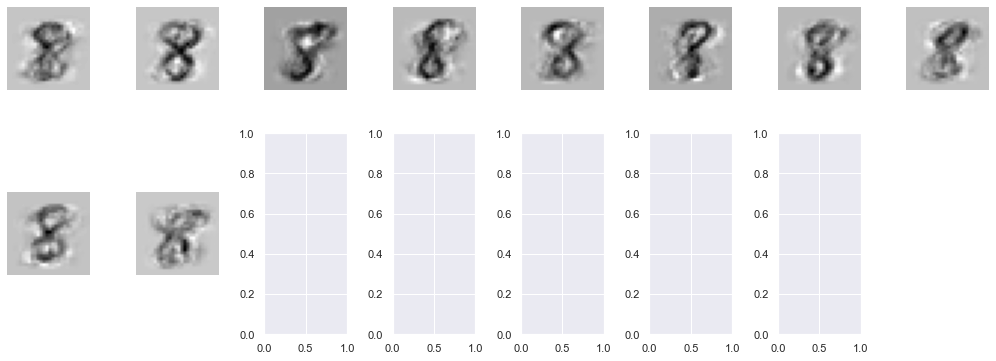

In [118]:
showDigits(digits=data_new, labels=y_null, indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

## Print a Number

In [ ]:
def showDigits(digits, labels, indexes, size=28):
    #Make a grid that is the right size
    pics = len(indexes)
    cols = 8
    rows = math.ceil(pics/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(14,6))
    plt.axis("off")

    #loop through the list of indexes, grab images and labels, plot in the "next" spot. 
    for i in range(0, pics):
        n = indexes[i]
        some_digit = digits[n:n+1]
        some_digit_image = np.array(some_digit).reshape(size, size)
        ax = axes[i//cols, i%cols]
        ax.axis("off")
        ax.imshow(some_digit_image, cmap=mpl.cm.binary)
        #ax.set_title('Ind: {} - Lbl: {}'.format(indexes[i], labels[n]))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

In [170]:
def get_digit(number, i):
    return number // 10**i % 10

def num_printer(number):
    cols = int(math.log10(number))+1
    rows = 1
    fig, axes = plt.subplots(rows, cols, figsize=(14,6))

    i = 0
    while i < cols:
        n = get_digit(number,i)
        dig = generators[n].sample(1)
        dig = dig[0]
        ax = axes[cols-1-i] #Need to find why it is backwards
        img = np.array(dig).reshape(28,28)
        ax.imshow(img, cmap=mpl.cm.binary)
        title_str = "I:", str(i), "N:", str(n)
        ax.set_title(title_str)
        i += 1

    plt.tight_layout()
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    plt.show()

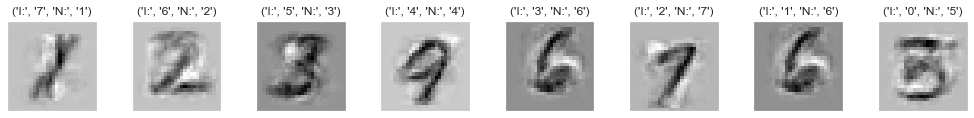

In [171]:
num_printer(12346765)